<h1> Robot Navigation Project </h1>

In [1]:
## referencies:
# http://vision.deis.unibo.it/~smatt/Papers/VI2002/VI2002.pdf

<h3> Libraries and Global Variables </h3>

In [2]:
f = 567.2 # focal length in pixel
b = 92.226 # base line in mm
cb_w = 125 # chessboard total width in  mm
cb_h = 178 # chessboard total height in mm
pattern_size = (6, 8) # number of inner corner, (columns, rows) of chessboard

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h3> Extracting image frames from video </h3>

In [4]:
roboL = cv2.VideoCapture('./robotL.avi')
roboL_frames = []

while roboL.isOpened():
    ret, frame = roboL.read()
    if not ret:
        break
    roboL_frames = roboL_frames + [frame]

In [5]:
roboR = cv2.VideoCapture('./robotR.avi')
roboR_frames = []

while roboR.isOpened():
    ret, frame = roboR.read()
    if not ret:
        break
    roboR_frames = roboR_frames + [frame]

In [6]:
print("No. of frames for left camera : ", len(roboL_frames))
print("No of frames for right camera : ", len(roboR_frames))

No. of frames for left camera :  389
No of frames for right camera :  389


In [7]:
roboL_frames[10].shape

(480, 640, 3)

<h3> Image Processing & Histogram Analysis on single image </h3>

In [8]:
img = roboL_frames[200]

In [9]:
def plot_histogram(image, title, mask=None):
	# split the image into its respective channels, then initialize
	# the tuple of channel names along with our figure for plotting
	chans = cv2.split(image)
	colors = ("b", "g", "r")
	plt.figure()
	plt.title(title)
	plt.xlabel("Bins")
	plt.ylabel("# of Pixels")
	# loop over the image channels
	for (chan, color) in zip(chans, colors):
		# create a histogram for the current channel and plot it
		hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
		plt.plot(hist, color=color)
		plt.xlim([0, 256])

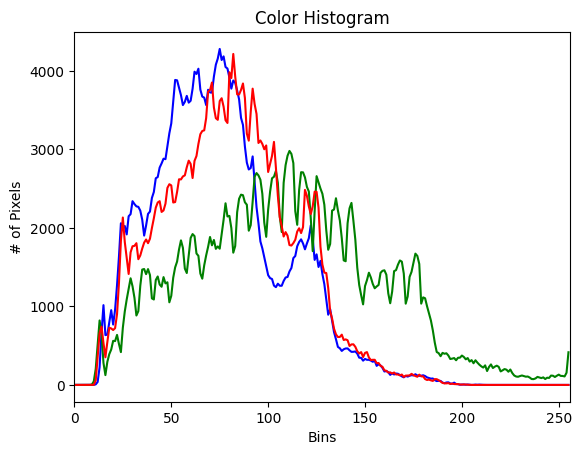

In [10]:
plot_histogram(img, 'Color Histogram')

In [13]:
img_gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

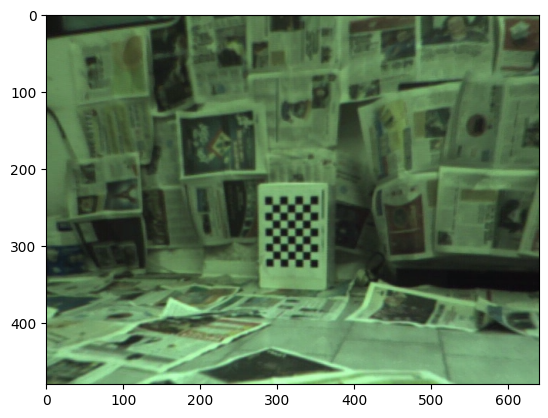

In [11]:
img_x = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img_x)
plt.show()

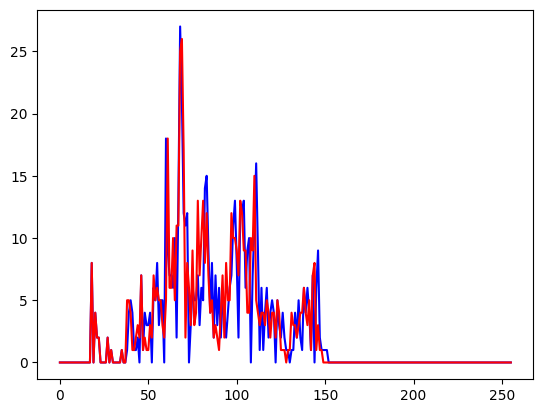

In [15]:
hist1 = cv2.calcHist(img_gray1, [0], None, [256], [0, 256])
hist2 = cv2.calcHist(img_gray2, [0], None, [256], [0, 256])
plt.plot(hist1, 'b')
plt.plot(hist2, 'r')
plt.show()

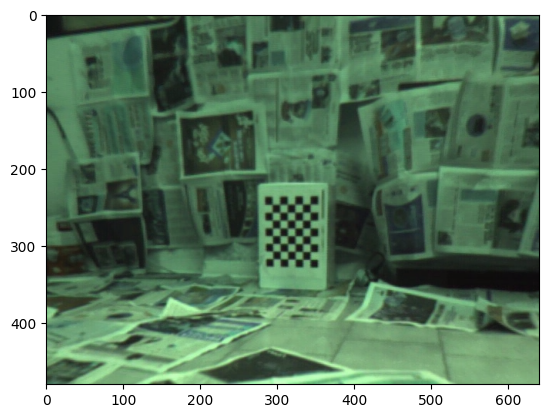

In [16]:
plt.imshow(img)
plt.show()

<h3> Detecting Chessboard Pattern (Single Image)</h3>

In [17]:
pattern_size = (6, 8) # number of inner corner, (columns, rows) for OpenCV

In [18]:
found, corners = cv2.findChessboardCorners(img_gray1, pattern_size)
print("Found: " , found)
print("2D image coordinate of corners: ", corners)

Found:  True
2D image coordinate of corners:  [[[293.69153 247.43808]]

 [[303.18195 247.35362]]

 [[313.2236  247.23634]]

 [[322.7295  246.74269]]

 [[332.788   246.7176 ]]

 [[342.7975  246.71107]]

 [[294.24158 257.9709 ]]

 [[303.48193 257.83267]]

 [[313.3007  257.4613 ]]

 [[322.93707 257.28674]]

 [[333.02103 257.4251 ]]

 [[343.09192 257.26068]]

 [[293.58896 267.96686]]

 [[303.57687 267.54797]]

 [[312.8876  267.6929 ]]

 [[322.98306 267.58124]]

 [[332.8609  267.79156]]

 [[342.61667 267.38065]]

 [[294.4216  278.46576]]

 [[303.607   277.81113]]

 [[313.51254 277.53912]]

 [[322.67526 277.8873 ]]

 [[333.20898 277.642  ]]

 [[342.5843  277.63666]]

 [[293.91055 287.7953 ]]

 [[303.85968 287.6363 ]]

 [[313.60068 287.5746 ]]

 [[323.45847 287.95535]]

 [[333.00674 287.98212]]

 [[342.9422  287.9815 ]]

 [[294.42526 297.72897]]

 [[303.74377 297.79254]]

 [[313.7105  297.74606]]

 [[323.41226 298.32745]]

 [[333.15802 298.15033]]

 [[342.5797  298.34378]]

 [[294.03024 307.8

In [19]:
# Do cornerSubPix only if chessboard found is True
if found:
    #Refining corner position to subpixel iteratively until criteria max_count=30 or criteria_eps_error=1 is sutisfied
    term = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_COUNT, 30, 1)
    #Image Corners 
    cv2.cornerSubPix(img_gray1, corners, (5, 5), (-1, -1), term)

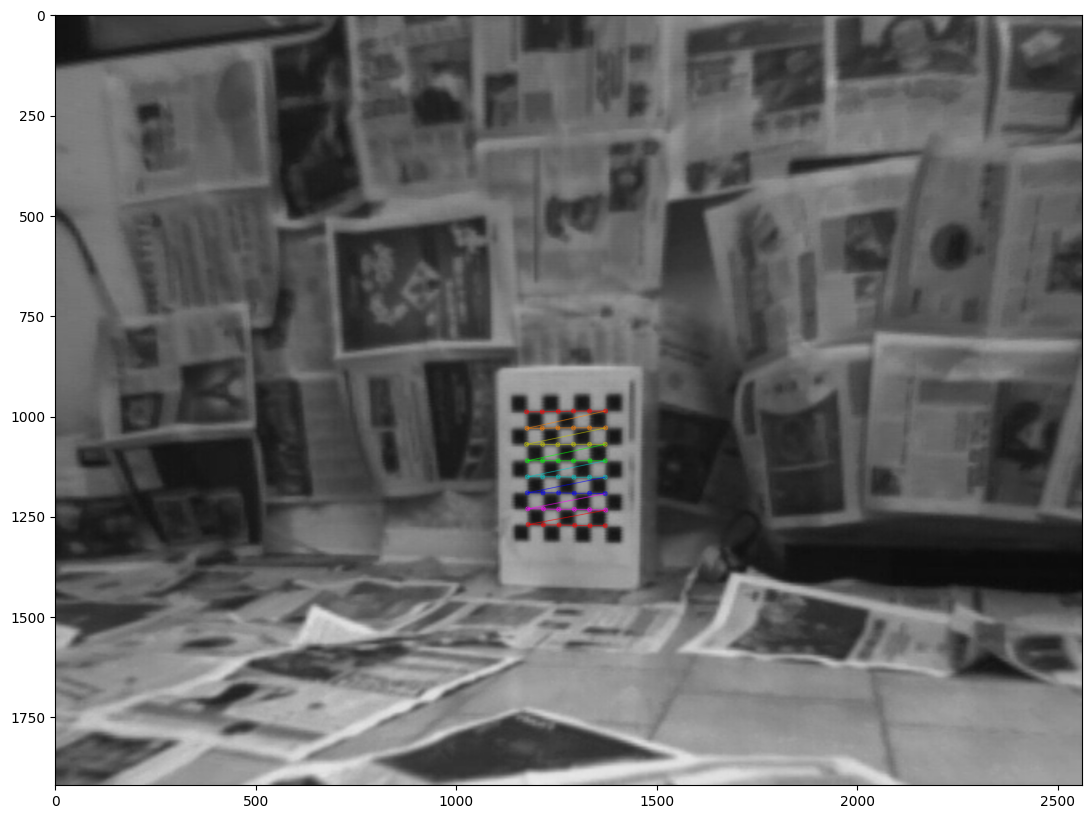

In [20]:
vis = cv2.cvtColor(img_gray1, cv2.COLOR_GRAY2BGR)
vis = cv2.resize(vis,None,fx=4, fy=4)
cv2.drawChessboardCorners(vis, pattern_size, corners*4, found)
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.show()

<h3> Converting to NumPy Array </h3>

In [20]:
np_L = np.array(roboL_frames)
np_R = np.array(roboR_frames)

In [21]:
np_L.shape

(389, 480, 640, 3)